In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

## Histogram

In [6]:
def hist(x,no_bins):
    no_samples = np.size(x)
    x_max = max(x)
    x_min = min(x)
    bins = np.linspace(x_min,x_max,no_bins)
    bin_width = abs(bins[1] - bins[0])
    freq = np.zeros(shape=(no_bins))
    for i in range(no_samples):
        for j in range(no_bins):
            if(x[i] <= bins[j]+0.5*bin_width and x[i] > bins[j]-bin_width):
                freq[j] += 1
                break
    freq =freq/(no_samples)
    return bins,freq

In [8]:
M = 10000 # Number of samples
no_bins = 30 #Number of bins for histogram

## <font color='red'>1. Show graphically for independently generated random variable $X$ and $Y$, $$f_{xy}(x,y)=f_x(x)f_y(y).$$ Also plot $f_{y/x}(y/x)$.</font> 
Note: Generate $X$ and $Y$ from Gaussian distribution with 0 mean and variance 1.

### Generate $X$.

(30,) 
 (1, 30)


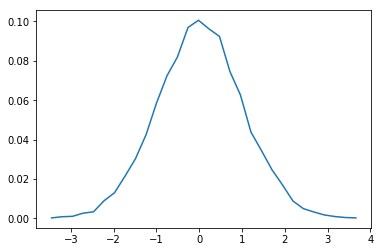

In [4]:
mu = 0
sigma = 1
X = np.random.normal(mu, sigma, M)
[x,fx]=hist(X,no_bins)
plt.figure()
plt.plot(x,fx)
fx = np.mat(fx)
print(x.shape,"\n", fx.shape)


### Generate $Y$.

[-3.29987778 -3.06755207 -2.83522636 -2.60290065 -2.37057494 -2.13824922
 -1.90592351 -1.6735978  -1.44127209 -1.20894638 -0.97662067 -0.74429496
 -0.51196924 -0.27964353 -0.04731782  0.18500789  0.4173336   0.64965931
  0.88198502  1.11431074  1.34663645  1.57896216  1.81128787  2.04361358
  2.27593929  2.508265    2.74059071  2.97291643  3.20524214  3.43756785]
(1, 30)


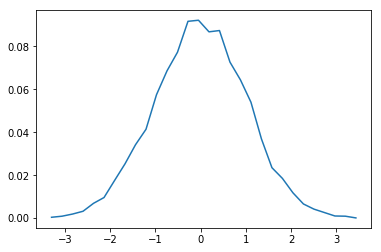

In [6]:
mu = 0
sigma = 1
Y = np.random.normal(mu, sigma, M)
[y,fy]=hist(Y,no_bins)
plt.figure()
plt.plot(y,fy)
fy = np.mat(fy)
print(y)
print(fy.shape)

### Now find $f_{xy}(x,y)$ using $f_x(x)$ and $f_y(y)$. 
HINT: $[f_{xy}(x,y)]_{no\_bins*no\_bins} = [f_{x}(x)]_{no\_bins \times 1} \times [f_{y}(y)]_{1\times no\_bins}$

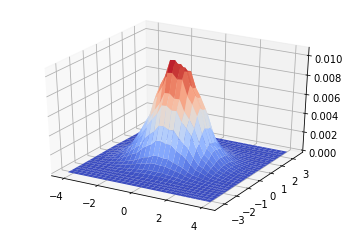

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fxy = np.matmul(fx.T,fy)
x1,y1 = np.meshgrid(x,y)
surf = ax.plot_surface(x1,y1, fxy, cmap=cm.coolwarm)

### Write code for joint histogram of two variable

In [10]:
def hist2(x,y,no_bins):
    freq = np.zeros(shape=(no_bins,no_bins))

    no_samplesx = np.size(x)
    x_max = max(x)
    x_min = min(x)
    binsx = np.linspace(x_min,x_max,no_bins)
    bin_width_x = abs(binsx[1] - binsx[0])
    
    no_samplesy = np.size(y)
    y_max = max(y)
    y_min = min(y)
    binsy = np.linspace(y_min,y_max,no_bins)
    bin_width_y = abs(binsy[1] - binsy[0])
    
    for a in range(no_samplesx):
            for c in range(no_bins):
                    if( x[a] <= (binsx[c]+bin_width_x*0.5) and x[a] >(binsx[c]-bin_width_x)):
                        break
            for d in range(no_bins):
                    if(y[a] <= (binsy[d]+bin_width_y*0.5) and y[a] > (binsy[d]-bin_width_y)):
                        break
            freq[c][d]+= 1/(no_bins**2)
         
    
    return binsx,binsy,freq

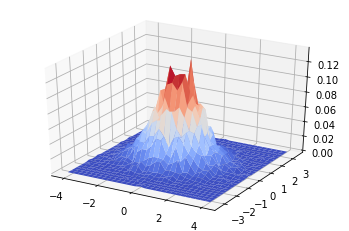

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
[x,y,fxy] = hist2(X,Y,no_bins)
x1,y1 = np.meshgrid(x,y)
surf = ax.plot_surface(x1,y1,fxy, cmap=cm.coolwarm)


## <font color='red'>2. Generate random variable $X$ and $Z=2X+3$. Plot $f_{xz}(x,z)$, $f_x(x)f_z(z)$ and $f_{y/x}(y/x)$. X and Z are independent?</font> 


### Generate Z

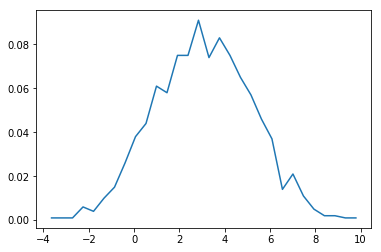

In [9]:
X = np.random.normal(0, 1, 1000)
Z = 2*X+3
[z,fz]=hist(Z,no_bins)
plt.figure()
plt.plot(z,fz)

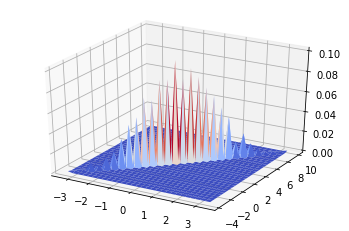

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#write code here
[x, z,fxz] = hist2(X, Z, no_bins)
x1,z1 = np.meshgrid(x,z)
surf = ax.plot_surface(x1,z1, fxz, cmap=cm.coolwarm)

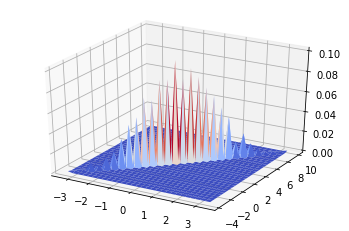

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
[x,z,fxz] = hist2(X,Z,no_bins)
x1,z1 = np.meshgrid(x,z)
surf = ax.plot_surface(x1,z1,fxz, cmap=cm.coolwarm)

## <font color='red'>3. If $X$ and $Y$ are uniform random variable with $-1<x,y<1$ and $Z=X+Y$, plot $f_X(x)$,$f_Y(y)$ and $f_Z(z)$.</font> 


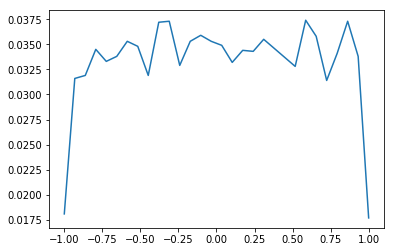

In [18]:
X = np.random.uniform(-1,1, M)
[x,fx]=hist(X,no_bins)
plt.figure()
plt.plot(x,fx)


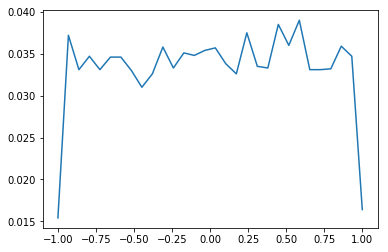

In [19]:
Y = np.random.uniform(-1,1, M)
[y,fy]=hist(Y,no_bins)
plt.figure()
plt.plot(y,fy)

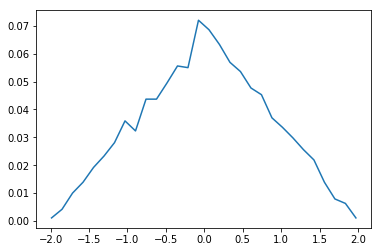

In [20]:
Z=X+Y
[z,fz]=hist(Z,no_bins)
plt.figure()
plt.plot(z,fz)